# The Sparks Foundation
## Task-2: Clustering
## Author: Balaji Mahadev Bahirwal

In [1]:
import pandas as pd
import numpy as np

In [23]:
cluster = pd.read_csv("C:\\Users\\bahirwal\\Desktop\\Balaji\\Internship_TSF\\Iris.csv")
cluster

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
cluster.shape

(150, 6)

In [25]:
cluster.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [26]:
print(cluster.describe())
print(cluster.info())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    

In [27]:
species = cluster["Species"]
species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [28]:
del cluster["Species"]

In [29]:
cluster.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [30]:
samples = cluster.values

In [34]:
from sklearn.cluster import KMeans

ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    
    # fit the model to samples
    model.fit(samples)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

C:\Users\bahirwal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


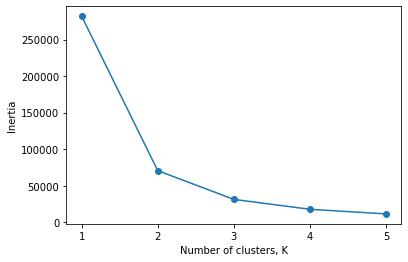

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot ks v/s inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, K')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [36]:
model = KMeans(n_clusters=3)

In [37]:
labels = model.fit_predict(samples)

In [39]:
# Count the number of times each grain variety coincides with each cluster lebel.

df = pd.DataFrame({'labels': labels, 'Species': species})
ct = pd.crosstab(df['labels'], df['Species'])
ct

Species,Iris-setosa,Iris-versicolor,Iris-virginica
labels,,,
0,1,49,0
1,0,1,50
2,49,0,0


## So there are three optimum clusters according to species, first of Iris-Setosa, second of Iris-versicolor and 3rd being Iris-virginica